In [1]:

# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# reading of data set

df= pd.read_csv("C:/Users/Dell/Desktop/VOIS/VOIS Internship September 2024Future of Data Analytics using AI-LLM's/Week4/Unicorn_Companies.csv")

##**Understaning of dataset**

In [3]:
# reading first 5 rows of the data
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
# reading of last 5rows

df.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


In [5]:
df.sample(5)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
457,Wayflyer,$2B,2022-02-01,Fintech,Dublin,Ireland,Europe,2019,$236M,"QED Investors, DST Global, Left Lane Capital"
341,KK Group,$3B,2019-10-23,E-commerce & direct-to-consumer,Dongguan,China,Asia,2014,$612M,"Matrix Partners China, Bright Venture Capita, ..."
826,LEAD School,$1B,2022-01-13,Edtech,Andheri,India,Asia,2012,$166M,"WestBridge Capital, GSV Ventures, Elevar Equity"
632,OVH,$1B,2016-08-15,Other,Roubaix,France,Europe,1999,$1B,"KKR, TowerBrook Capital Partners"
366,Fenbi Education,$2B,2021-02-07,Edtech,Beijing,China,Asia,2015,$390M,"Trustbridge Partners, Hony Capital, IDG Capital"


In [6]:
#undestanding information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


##**Insights**

#1.we can observe from the above valuation and funding convert into numeric value  

#2. datajoined data type converted into datetime



In [7]:
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'B' in value:
            return float(value.replace('$', '').replace('B', '')) * 1e9
        elif 'M' in value:
            return float(value.replace('$', '').replace('M', '')) * 1e6
    return np.nan

# Apply conversion
df['Valuation'] = df['Valuation'].apply(convert_to_numeric)
df['Funding'] = df['Funding'].apply(convert_to_numeric)

# Convert 'Date Joined' to datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

In [8]:
df.head(1)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."


In [9]:
# finding data types


df.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Funding                    float64
Select Investors            object
dtype: object

In [10]:
# Statistical analysis on categorical data

df.describe(include="object").T

,count,unique,top,freq
Company,1074,1073,Bolt,2
Industry,1074,16,Fintech,224
City,1058,256,San Francisco,152
Country,1074,46,United States,562
Continent,1074,6,North America,589
Select Investors,1073,1058,Sequoia Capital,3


In [11]:
# Statistical analysis on numerical data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Valuation,1074.0,3455307262.569832,1000000000.0,1000000000.0,2000000000.0,3000000000.0,180000000000.0,8547022216.45056
Date Joined,1074,2020-05-19 15:35:51.955307264,2007-07-02 00:00:00,2019-05-20 06:00:00,2021-03-29 00:00:00,2021-09-19 18:00:00,2022-04-05 00:00:00,NaN
Year Founded,1074.0,2012.895717,1919.0,2011.0,2014.0,2016.0,2021.0,5.698573
Funding,1062.0,557269303.201507,0.0,223000000.0,370000000.0,609250000.0,14000000000.0,810133578.878257


In [12]:
# chceking missing values

df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding             12
Select Investors     1
dtype: int64

In [13]:
# finding % of null values
df.isnull().sum()/df.shape[0]*10

Company             0.000000
Valuation           0.000000
Date Joined         0.000000
Industry            0.000000
City                0.148976
Country             0.000000
Continent           0.000000
Year Founded        0.000000
Funding             0.111732
Select Investors    0.009311
dtype: float64

In [14]:
df['City'].value_counts()

City
San Francisco    152
New York         103
Beijing           63
Shanghai          44
London            34
                ... 
Santa Barbara      1
Altrincham         1
Northbrook         1
Cincinnati         1
Milpitas           1
Name: count, Length: 256, dtype: int64

In [15]:
# fiiling missing value of city

df['City'].fillna(df['City'].mode()[0],inplace=True)

In [16]:
# flling missing value of funding

df['Funding'].fillna(df['Funding'].median(),inplace=True)

In [17]:
# filling missing value of investor

df['Select Investors'].fillna('Unknown', inplace=True)

In [18]:
# reachecking of missing values

df.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [19]:
# checking duplicated values

df.duplicated().sum()

0

# Exploration of Data

In [ ]:

# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Valuation', 'Date Joined', 'Year Founded', 'Funding']

We have 6 categorical features : ['Company', 'Industry', 'City', 'Country', 'Continent', 'Select Investors']


In [31]:
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Valuation', 'Date Joined', 'Year Founded', 'Funding']

We have 6 categorical features : ['Company', 'Industry', 'City', 'Country', 'Continent', 'Select Investors']


# Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable. Other Type of Analysis are

# Bivariate Analysis: The analysis of two variables.

# Multivariate Analysis: The analysis of two or more variables.

In [21]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print()
    print()
    print('---------------------------')

Company
Bolt               0.18622
Bytedance          0.09311
Yidian Zixun       0.09311
Klook              0.09311
Epirus             0.09311
                    ...   
eDaili             0.09311
ENOVATE            0.09311
Fenbi Education    0.09311
Hesai Tech         0.09311
Zwift              0.09311
Name: proportion, Length: 1073, dtype: float64


---------------------------
Industry
Fintech                                20.856611
Internet software & services           19.087523
E-commerce & direct-to-consumer        10.335196
Health                                  6.890130
Artificial intelligence                 6.797020
Other                                   5.400372
Supply chain, logistics, & delivery     5.307263
Cybersecurity                           4.655493
Data management & analytics             3.817505
Mobile & telecommunications             3.538175
Hardware                                3.165736
Auto & transportation                   2.886406
Edtech               

##**Numerical Features**

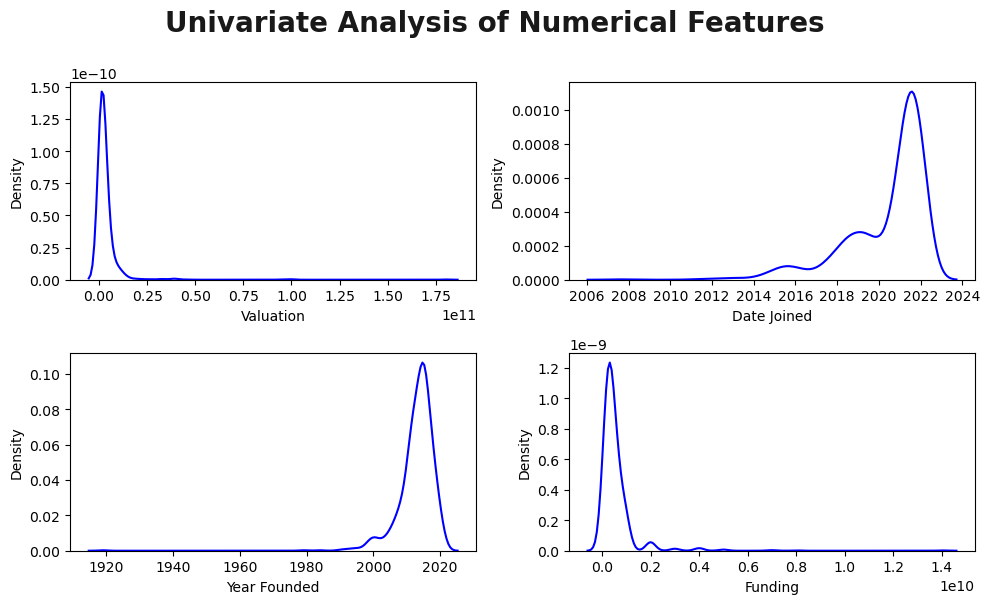

In [22]:
import math

num_features = len(numeric_features)
rows = math.ceil(num_features / 2)  # Calculate number of rows

plt.figure(figsize=(10, 3 * rows))  # Adjust figure size based on the number of rows
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.)

for i in range(num_features):
    plt.subplot(rows, 2, i+1)  # 2 columns for each row
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

##**Reporting**

##from the above data we can understand  
## 1.valuation and funding have right skew ness

## 2.date joined and year founded have left skewness

## **Categorical Features**

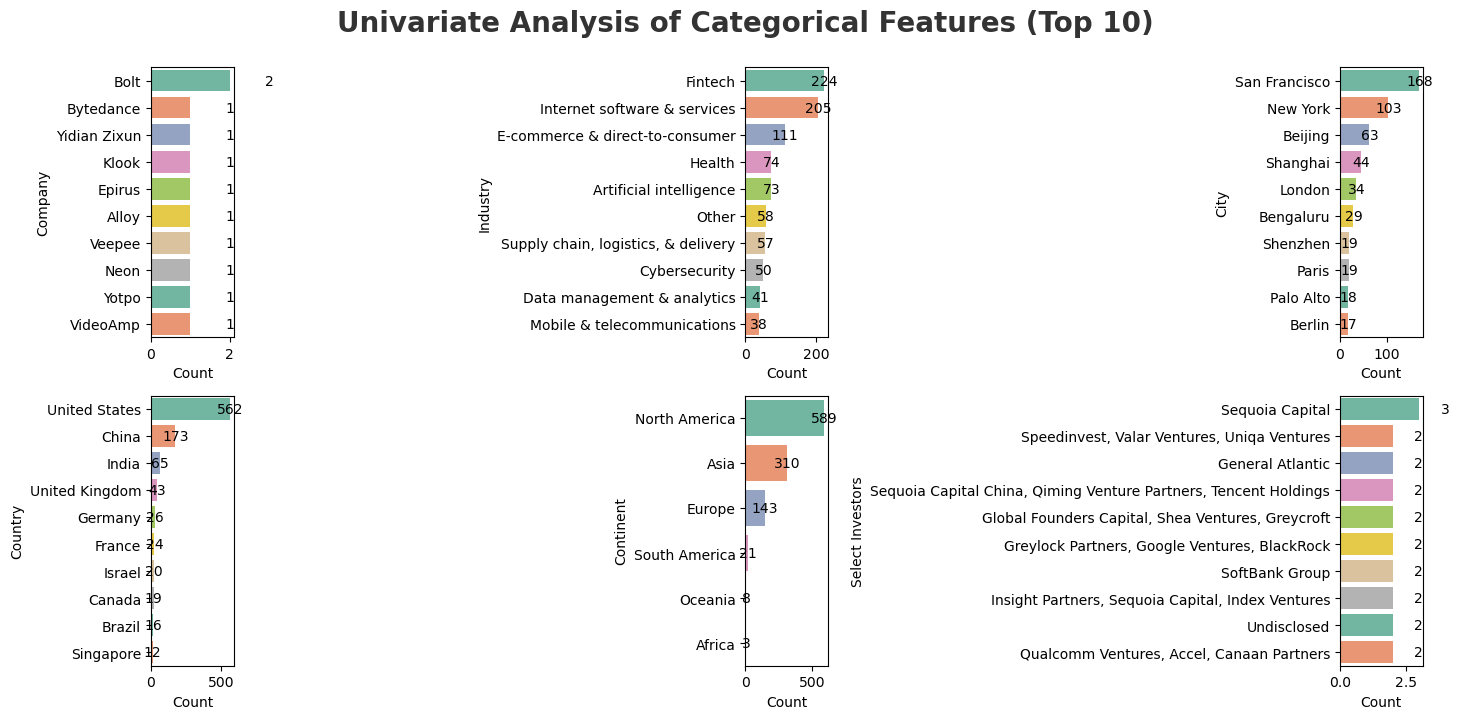

In [23]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Categorical Features (Top 10)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Loop through each categorical feature and plot the top 10 categories
for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)

    # Get the top 10 values for each categorical feature
    top_10_values = df[categorical_features[i]].value_counts().nlargest(10).index

    # Create countplot with custom color palette
    plot = sns.countplot(y=categorical_features[i], data=df[df[categorical_features[i]].isin(top_10_values)],
                         order=top_10_values, palette='Set2')

    # Annotate each bar with the corresponding count
    for p in plot.patches:
        count = int(p.get_width())  # Get the count (bar width)
        plot.text(p.get_width() + 1,  # Position text at the right end of the bar
                  p.get_y() + p.get_height() / 2,  # Center the text vertically
                  count,  # The value to display
                  ha='center', va='center', fontsize=10, color='black')  # Text properties

    # Set labels
    plt.xlabel('Count')
    plt.ylabel(categorical_features[i])

    # Adjust layout
    plt.tight_layout()

# Show the plots
plt.show()

In [24]:
df.head(1)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."


In [25]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 4 continuous_features : ['Valuation', 'Date Joined', 'Year Founded', 'Funding']


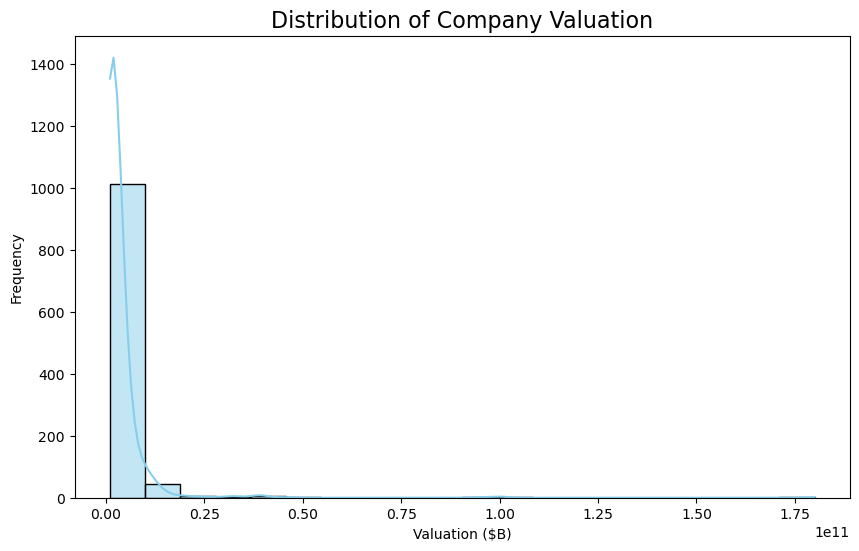

In [26]:
# 1. Distribution of Valuation
plt.figure(figsize=(10, 6))
sns.histplot(df['Valuation'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Company Valuation', fontsize=16)
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

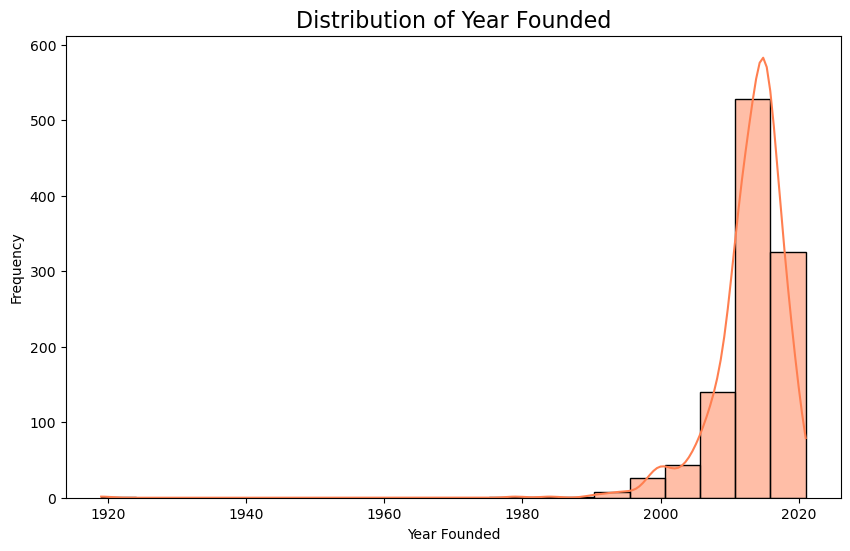

In [27]:
# 2. Year Founded distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Year Founded'], bins=20, kde=True, color='coral')
plt.title('Distribution of Year Founded', fontsize=16)
plt.xlabel('Year Founded')
plt.ylabel('Frequency')
plt.show()

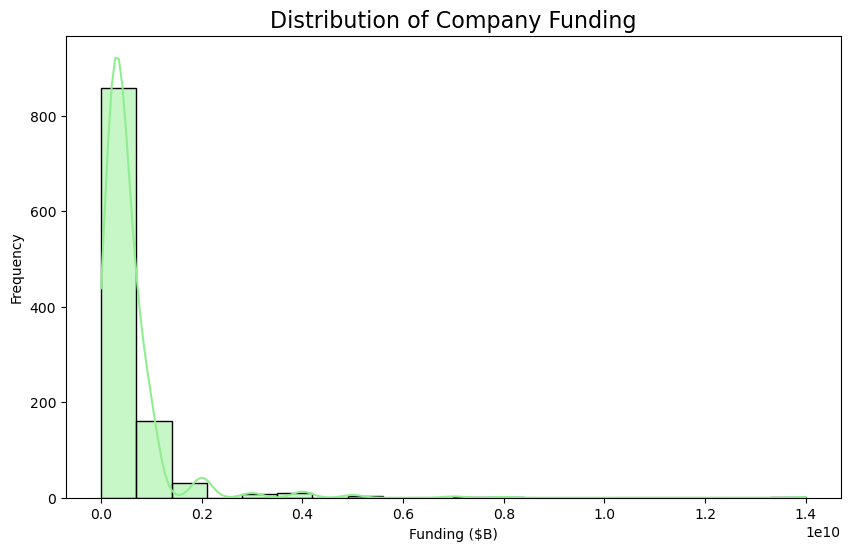

In [28]:
# 5. Distribution of Funding
plt.figure(figsize=(10, 6))
sns.histplot(df['Funding'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Company Funding', fontsize=16)
plt.xlabel('Funding ($B)')
plt.ylabel('Frequency')
plt.show()

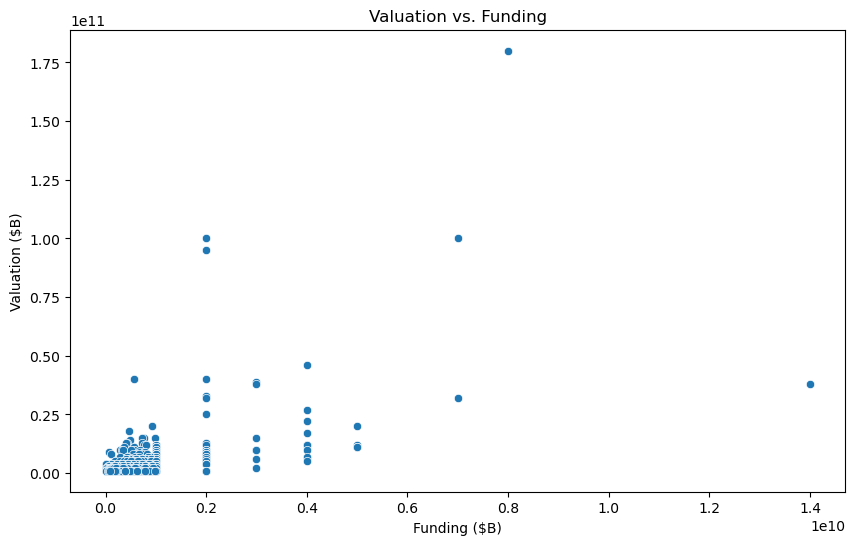

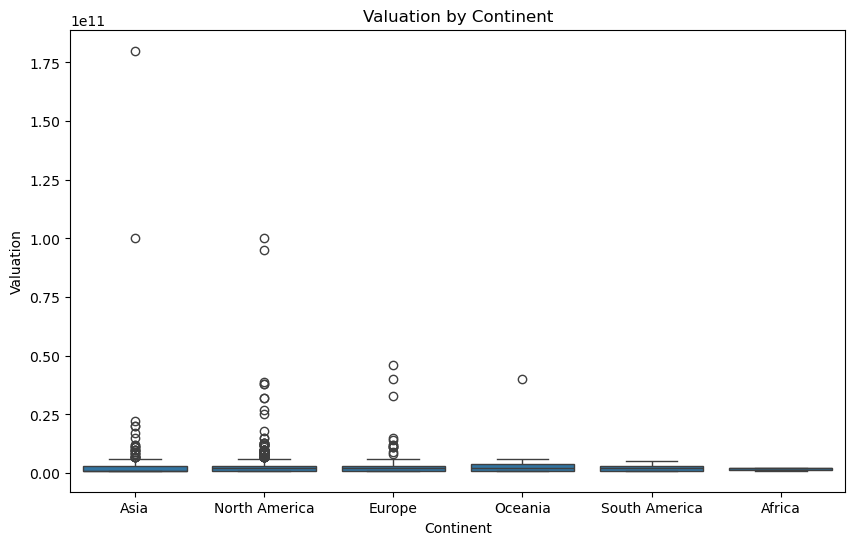

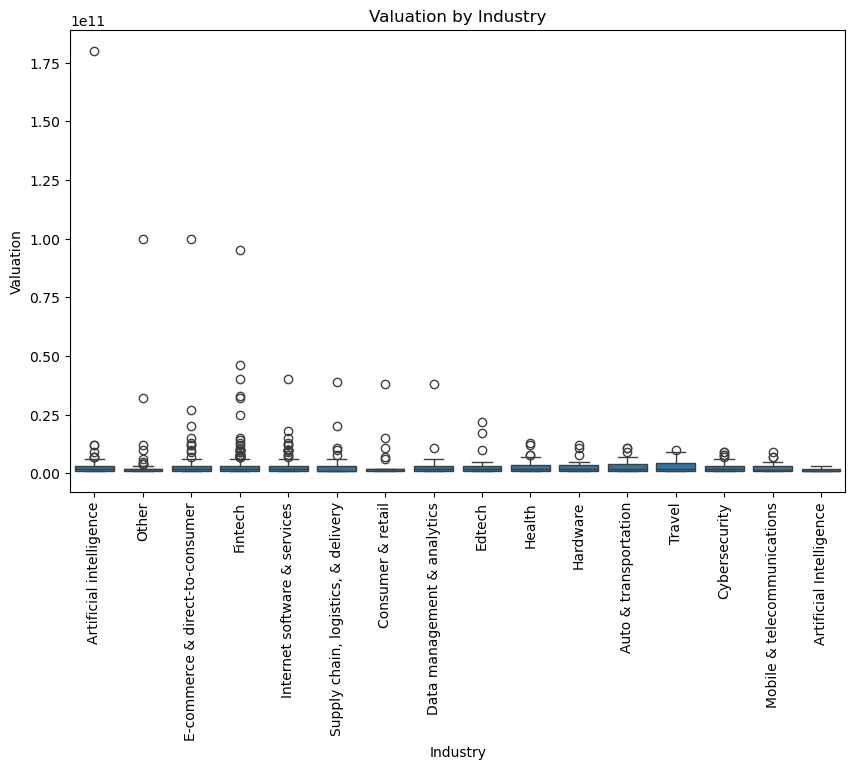

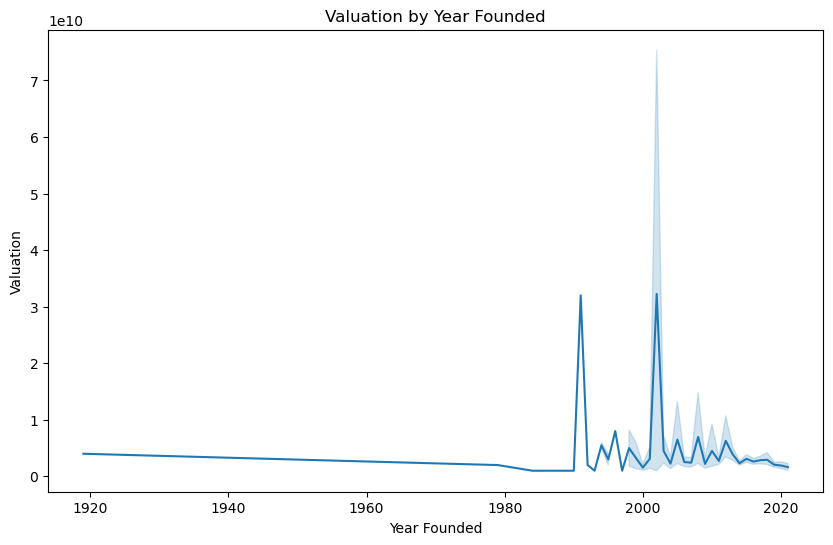

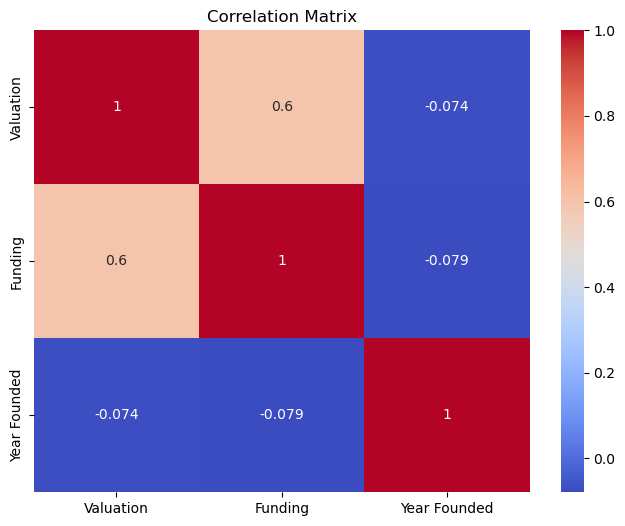

In [29]:
# 1. Valuation vs Funding (Scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Funding', y='Valuation', data=df)
plt.title('Valuation vs. Funding')
plt.xlabel('Funding ($B)')
plt.ylabel('Valuation ($B)')
plt.show()

# 2. Valuation by Continent (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', y='Valuation', data=df)
plt.title('Valuation by Continent')
plt.show()

# 3. Valuation by Industry (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Valuation', data=df)
plt.xticks(rotation=90)
plt.title('Valuation by Industry')
plt.show()

# 4. Valuation by Year Founded (Line plot)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year Founded', y='Valuation', data=df)
plt.title('Valuation by Year Founded')
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Valuation', 'Funding', 'Year Founded']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


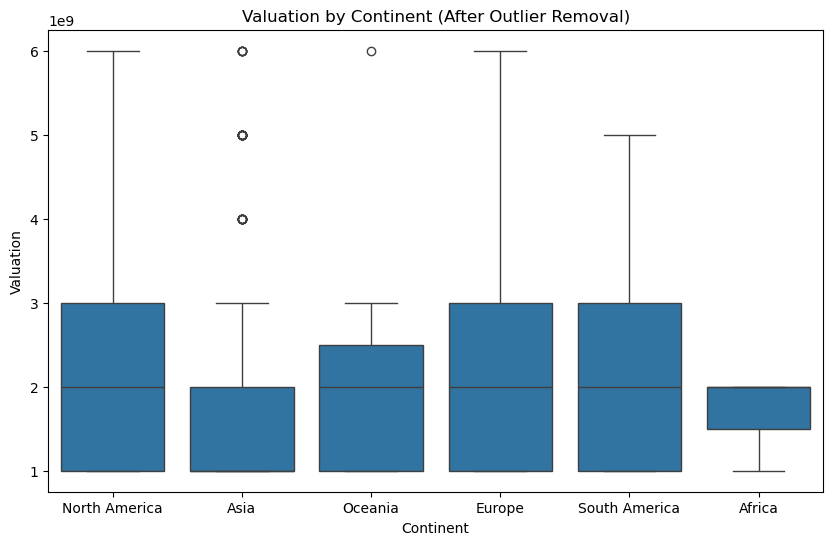

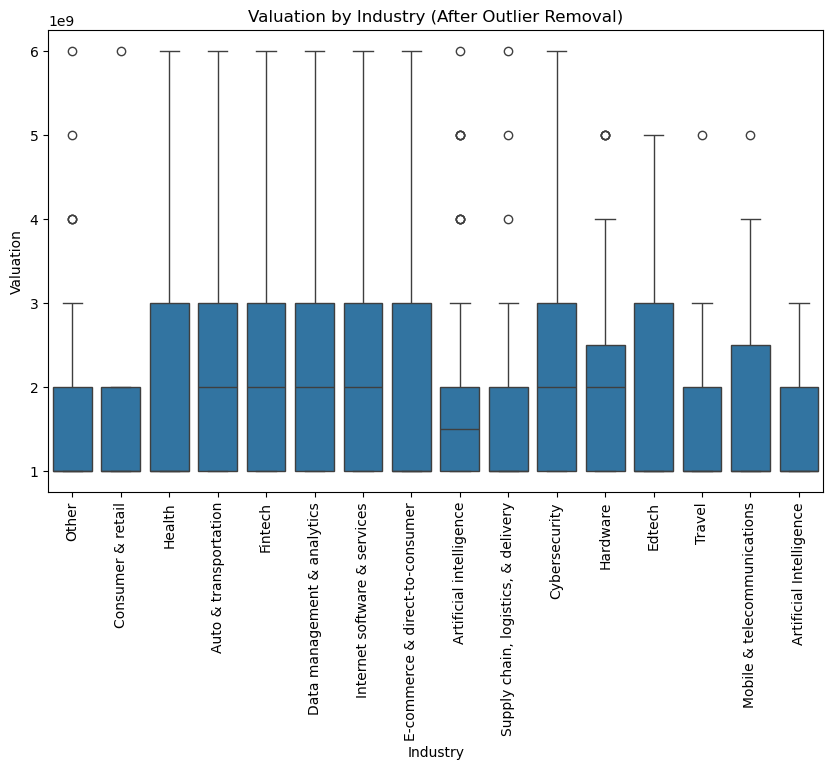

In [30]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Valuation'
df_no_outliers = remove_outliers(df, 'Valuation')

# 2. Valuation by Continent (Boxplot without outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', y='Valuation', data=df_no_outliers)
plt.title('Valuation by Continent (After Outlier Removal)')
plt.show()

# 3. Valuation by Industry (Boxplot without outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Valuation', data=df_no_outliers)
plt.xticks(rotation=90)
plt.title('Valuation by Industry (After Outlier Removal)')
plt.show()